# Assignment 1

First we need to import a few modules, execute the cell below:

In [2]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [5]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    return numpy.cos(x)

You can use the following cell to check that your code works for scalar arguments:

In [7]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [9]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [12]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    return -numpy.sin(x)

In [13]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [14]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [15]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    return (f(x) - f(x-dx))/dx

In [16]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


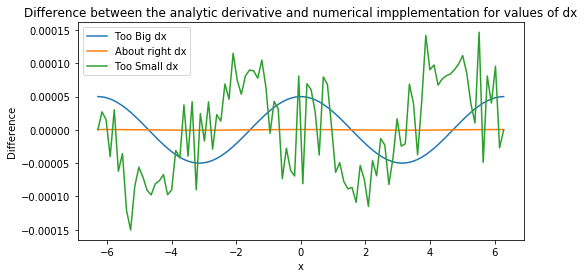

In [41]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-12)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.xlabel("x")
plt.ylabel("Difference")
plt.title("Difference between the analytic derivative and numerical impplementation for values of dx")
fx1=plt.plot(xs, df_dx_1 - df_dx_analytical)
fx2=plt.plot(xs, df_dx_2 - df_dx_analytical)
fx3=plt.plot(xs, df_dx_3 - df_dx_analytical)
plt.legend(('Too Big dx', 'About right dx', 'Too Small dx'))

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When dx is too small, the computer will lose digits when it carries them across as only a certain about of digits will be stored between calculations. In later calculations it will try to replace the data but it will most likely will be wrong. This looses accuracy as the numbers used are incorrect, leading to the random graph shown above.

The numerical method finds the derivative at x  by finding the gradient of the straight line joining x and x-dx. If dx is around the right size the straight line is about the tangent at point x, hence the gradient is correct. If dx is too big then the straight line the numical method produces is a poor approximation of the tangent. It doesn't follow the curve of f(x) and the gradient looses accuracy.